## 19200109 Assignment 1

<b>Name: Nithin Kumar Thimmegowda</b><br>
<b>Student Number: 19200109</b>

In [197]:
import datetime
import pandas as pd
import requests
import json
import csv
import matplotlib
import matplotlib.pyplot as plt

### Task 1 :-  Selecting API

The Api which i have selected to use is the one that provides details regarding the Air quality either by Co-ordinates, Country, city, Weather or Postal Code. I have chosen to get the data based on the Country Code. The Country Chosen is Ireland.</br>

API updates the Records every one hour and i have collected data for <b>24 hours</b> from the website https://rapidapi.com/</br>
Host api used is "https://ambee-air-quality.p.rapidapi.com/latest/by-country-code" with key provided by the "rapidApi" once we register with them.</br>

Key which i have recevied is <b>"de5ceb90famsh9e84523314ac0cep101ce5jsn46086dc2cff7"</b>.
This key and the host url provided above has to be used as headers to get the data.

### Task 2 :- Collection of the Data, Parse and Store in required format


Below Code is used to create the file, fetch the data and write the data to csv file 


In [160]:
# Url used to fetch the air quality details by country 
url = "https://ambee-air-quality.p.rapidapi.com/latest/by-country-code"

# Limit--> Number of rows to return, Ireland has 138 places, so it returns 138 JSON OBJETCS
# countryCOde--> IE --> Ireland
querystring = {"limit":"500","countryCode":"IE"}

# Headers passed with the request
headers = {
    'x-rapidapi-host': "ambee-air-quality.p.rapidapi.com",
    'x-rapidapi-key': "de5ceb90famsh9e84523314ac0cep101ce5jsn46086dc2cff7"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [4]:
#Function to create a file
def create_file (file_name, col_featur_names): 
    with open(file_name, "w",newline='') as write_file: #as in get_and_write_data function 
        f = csv.writer(write_file)
        f.writerow(col_featur_names)
    write_file.close()

In [31]:
# Function to convert the Response text received into JSON
# and writing to the csv file "ResponseData.csv"

def fetchRawData(response):
    with open("responseData.csv", "a",newline='') as resposeDataFile:
        json_data = json.loads(response.text)
        item_array=json_data["stations"]
        for item in item_array:
            f = csv.writer(resposeDataFile,delimiter=',')
            row = []
            row.append(item["Id"])
            row.append(item["NO2"])
            row.append(item["PM10"])
            row.append(item["PM25"])
            row.append(item["CO"])
            row.append(item["SO2"])
            row.append(item["OZONE"])
            row.append(item["AQI"])
            if item['aqiInfo'] is not None and item['aqiInfo'] != "{}":
                aquiJson=json.loads(item["aqiInfo"])
                row.append(aquiJson["category"])
                row.append(aquiJson["pollutant"])
                row.append(aquiJson["concentration"])
            else:
                row.append(None)
                row.append(None)
                row.append(None)
            row.append(item["updatedAt"])
            row.append(item["countryCode"])
            row.append(item["placeName"])
            row.append(item["postalCode"])
            row.append(item["state"])
            row.append(item["city"])
            row.append(item["division"])
            row.append(item["lat"])
            row.append(item["lng"])
            row.append(item["updateTs"])
            f.writerow(row)
        resposeDataFile.close()

In [98]:
# Column names that needs to be included in the csv file
columnNames = ["Id","NO2","PM10","PM25","CO","SO2","OZONE","AQI","category","pollutant","concentration","updatedAt",
               "countryCode","placeName","postalCode","state","city","division","lat","lng","updateTs"]
# creating the csv file with specified column names
create_file("responseData.csv",columnNames)


In [57]:
# send the repsonse text recevied and convert into JSON
# and then write it into CSV fie
fetchRawData(response)

In [76]:
# creating a data frame 
df = pd.read_csv("responseData.csv")

In [73]:
print(df)

           Id   NO2   PM10   PM25    CO   SO2  OZONE   AQI  category  \
0     7523015  3.47   8.22   4.87  0.69  0.60  36.21   NaN       NaN   
1     7523016  3.47   8.22   4.87  0.69  0.60  36.21   NaN       NaN   
2     7523017  6.45  16.77  11.94  0.69  1.24  36.21  54.0  Moderate   
3     7523018  3.47   8.22   4.87  0.69  0.60  31.39  26.0      Good   
4     7523019  3.47   8.22   4.87  0.69  0.60  36.21   NaN       NaN   
...       ...   ...    ...    ...   ...   ...    ...   ...       ...   
2893  7523148  3.47   8.22   4.87  0.69  0.60  40.13  41.0      Good   
2894  7523149  6.88   8.22   4.87  0.69  0.88  36.21   4.0      Good   
2895  7523150  4.12   8.22   4.87  0.69  0.60  34.38  36.0      Good   
2896  7523151  4.58   8.22   4.87  0.69  0.88  36.21   5.0      Good   
2897  7523152  6.91   8.22   4.87  0.69  0.88  36.21   6.0      Good   

     pollutant  ...  countryCode     placeName postalCode state city  \
0          NaN  ...           IE  Ballyboughal        A41   NaN

In [60]:
df.shape

(2898, 21)

In [62]:
df.isnull().sum()

Id                  0
NO2                 0
PM10                0
PM25                0
CO                  0
SO2                 0
OZONE               0
AQI               764
category          885
pollutant         885
concentration     885
updatedAt           0
countryCode         0
placeName           0
postalCode          0
state            2898
city             2898
division         2898
lat                 0
lng                 0
updateTs            0
dtype: int64

### Task 3 : - Selecting the features which are necessory for data processing and further analysis

In [227]:
df['updatedAt'] = pd.to_datetime(df['updatedAt'])
required_features = df[['NO2','PM10','PM25','CO','SO2','OZONE','AQI','updatedAt']]


,NO2,PM10,PM25,CO,SO2,OZONE,AQI,updatedAt
0,3.47,8.22,4.87,0.69,0.60,36.21,NaN,2020-03-22 20:36:52+00:00
1,3.47,8.22,4.87,0.69,0.60,36.21,NaN,2020-03-22 20:36:52+00:00
2,6.45,16.77,11.94,0.69,1.24,36.21,54.0,2020-03-22 20:36:52+00:00
3,3.47,8.22,4.87,0.69,0.60,31.39,26.0,2020-03-22 20:36:52+00:00
4,3.47,8.22,4.87,0.69,0.60,36.21,NaN,2020-03-22 20:36:52+00:00
...,...,...,...,...,...,...,...,...
2893,3.47,8.22,4.87,0.69,0.60,40.13,41.0,2020-03-23 19:07:14+00:00
2894,6.88,8.22,4.87,0.69,0.88,36.21,4.0,2020-03-23 19:07:14+00:00
2895,4.12,8.22,4.87,0.69,0.60,34.38,36.0,2020-03-23 19:07:14+00:00
2896,4.58,8.22,4.87,0.69,0.88,36.21,5.0,2020-03-23 19:07:14+00:00


### Task 4 :- Applying preprocessing steps

Dropping the columns with Nan values

In [229]:
required_features=required_features.dropna()
required_features

,NO2,PM10,PM25,CO,SO2,OZONE,AQI,updatedAt
2,6.45,16.77,11.94,0.69,1.24,36.21,54.0,2020-03-22 20:36:52+00:00
3,3.47,8.22,4.87,0.69,0.60,31.39,26.0,2020-03-22 20:36:52+00:00
7,3.47,19.21,4.87,0.69,0.60,36.21,29.0,2020-03-22 20:36:52+00:00
8,9.33,20.96,4.87,0.69,0.60,36.21,28.0,2020-03-22 20:36:52+00:00
11,9.33,19.96,4.87,0.69,0.60,36.21,26.0,2020-03-22 20:36:52+00:00
...,...,...,...,...,...,...,...,...
2893,3.47,8.22,4.87,0.69,0.60,40.13,41.0,2020-03-23 19:07:14+00:00
2894,6.88,8.22,4.87,0.69,0.88,36.21,4.0,2020-03-23 19:07:14+00:00
2895,4.12,8.22,4.87,0.69,0.60,34.38,36.0,2020-03-23 19:07:14+00:00
2896,4.58,8.22,4.87,0.69,0.88,36.21,5.0,2020-03-23 19:07:14+00:00


In [210]:
required_features.shape

(2134, 8)

In [211]:
required_features.isnull().sum()

NO2          0
PM10         0
PM25         0
CO           0
SO2          0
OZONE        0
AQI          0
updatedAt    0
dtype: int64

In [230]:
required_features.describe()

,NO2,PM10,PM25,CO,SO2,OZONE,AQI
count,2134.000000,2134.000000,2134.00000,2.134000e+03,2134.000000,2134.000000,2134.000000
mean,4.338210,9.446097,5.78351,6.900000e-01,0.666912,35.187029,21.962043
std,1.369963,2.617103,2.11154,1.110483e-16,0.146926,3.266644,17.919808
min,2.320000,5.020000,4.87000,6.900000e-01,0.600000,19.420000,-2.000000
25%,3.470000,8.220000,4.87000,6.900000e-01,0.600000,36.210000,6.000000
50%,3.470000,8.220000,4.87000,6.900000e-01,0.600000,36.210000,18.000000
75%,5.057500,8.220000,4.87000,6.900000e-01,0.600000,36.210000,35.000000
max,15.280000,32.060000,18.98000,6.900000e-01,1.240000,42.180000,89.000000


In [213]:
required_features.dtypes.value_counts() 

float64                7
datetime64[ns, UTC]    1
dtype: int64

### Task 5 :- Graphical Representation , Analysis and Summerization

Selected Features are grouped by updated time

In [214]:
air_quality=required_features.groupby(required_features.updatedAt.dt.time).mean()

<b>Before we Start analysing the graphs, below are some Pre requisites</b>

Air Pollution is measured by using the AQI(Air quality Index). Number of gases which causes air pollution are as below

Nitrogen oxides (NOx)<br>
Sulphur dioxide (SO2)<br>
Carbon monoxide (CO)<br>
Ozone (O3)<br>
Particulate matter (PM10) <br>
Particulate matter with diameter less than 2.5 micrometers(PM25)<br>

<b>Air qaulity is good when AQI(Air quality index) is less than 30</b>


Text(0.5, 0, 'Hours')

<Figure size 432x288 with 0 Axes>

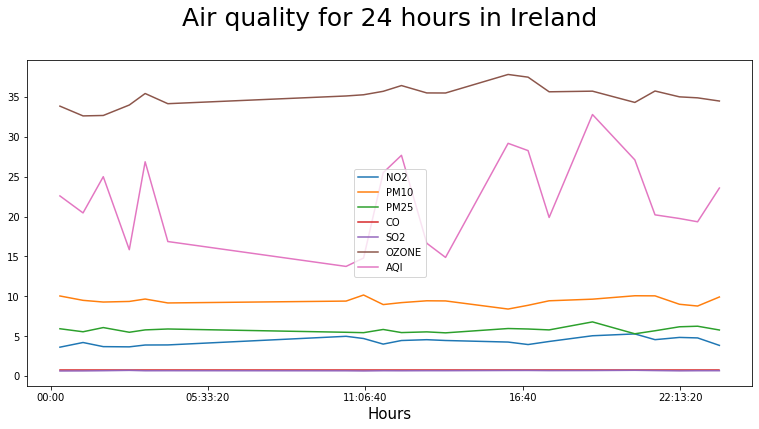

In [234]:
plt.figure()
air_quality.plot(stacked=False,figsize=(13,6))
plt.title("Air quality for 24 hours in Ireland\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

Text(0.5, 0, 'Hours')

<Figure size 432x288 with 0 Axes>

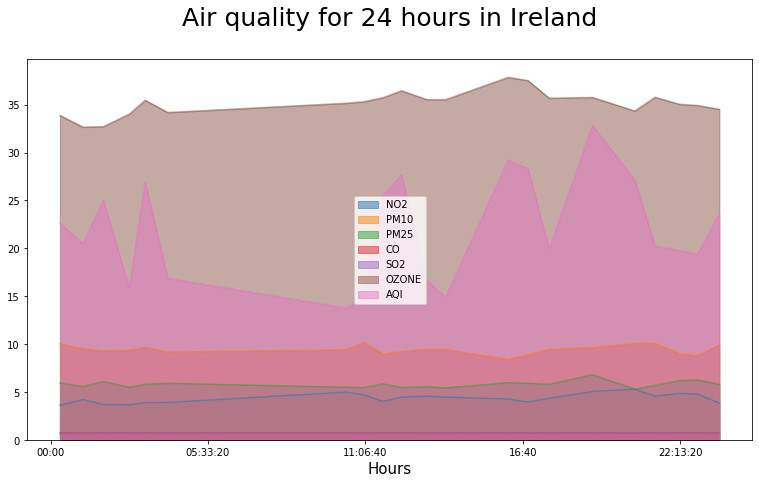

In [233]:
plt.figure()
air_quality.plot.area(stacked=False,figsize=(13,7))
plt.title("Air quality for 24 hours in Ireland\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

#### Summary
Depicting the different gases with AQI in two different ways.
<br>From the graphs we see that there is significant dependency on the ozone(O3) and AQI, it increases at 2.30 hrs and decreases at 5.00 hrs and see the same thing again in the time frame 13.00hrs and 16.00 hrs. 
<br>we also see a relation with PM10 , PM25, Ozone and AQI at time frame 11.000 hrs and 12.30 hrs. 
<br>we see CO is almost constant and has no impact on the AQI.

<b>From the Above graphs we see that AQI level is almost less than 30 in the day which implies the air quality is good for the day for which data is collected except at time frame 17.00 hrs - 19.00 hrs.</b>


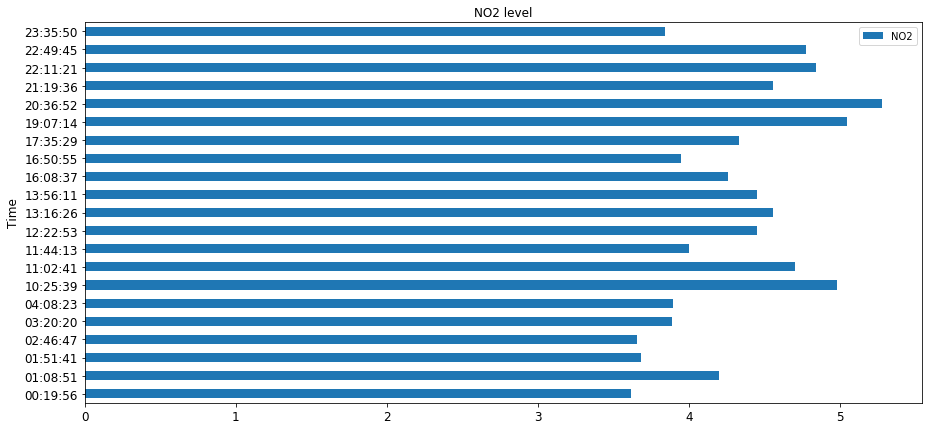

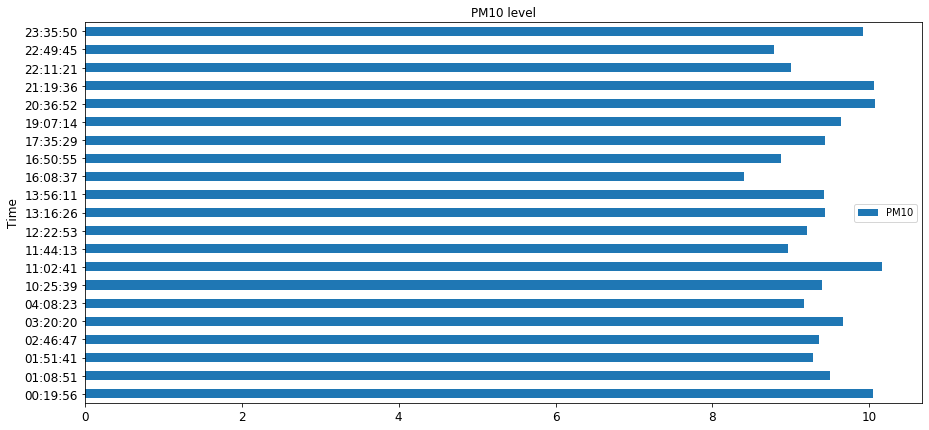

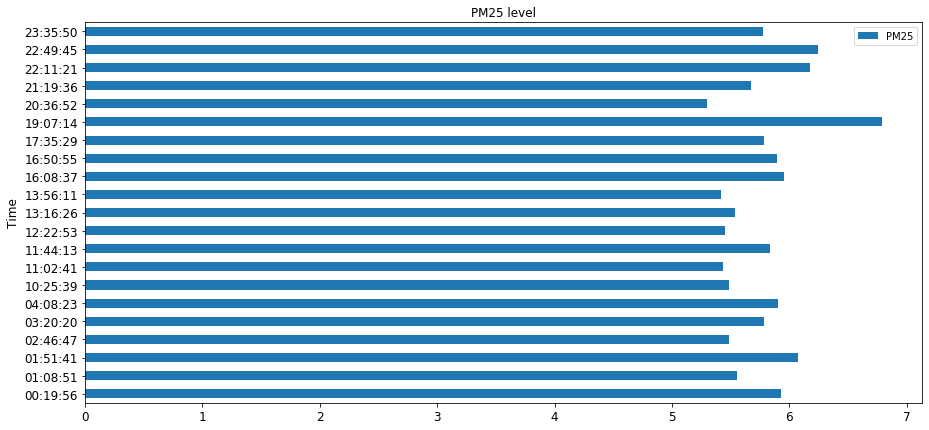

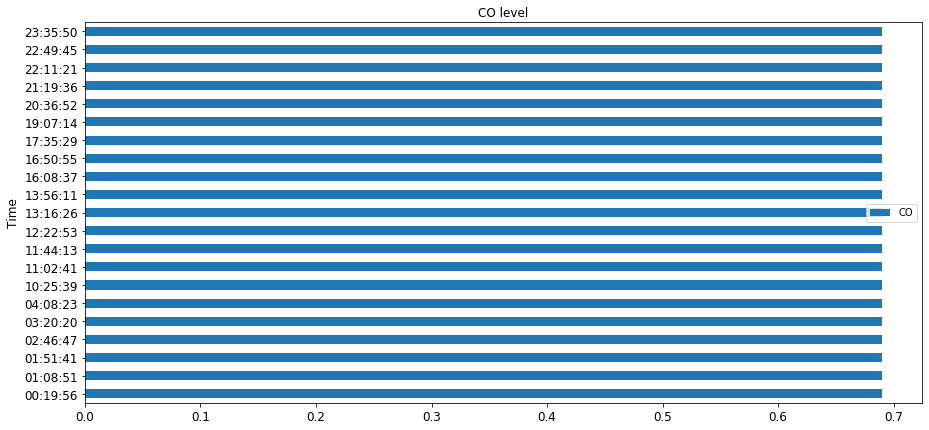

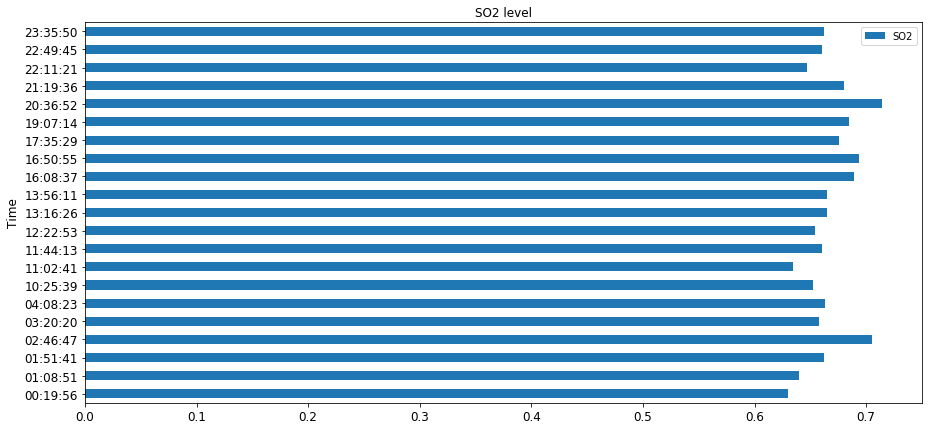

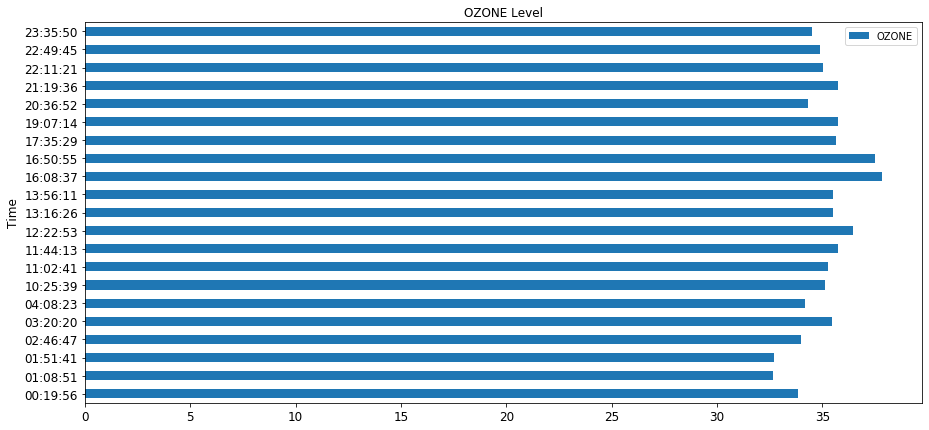

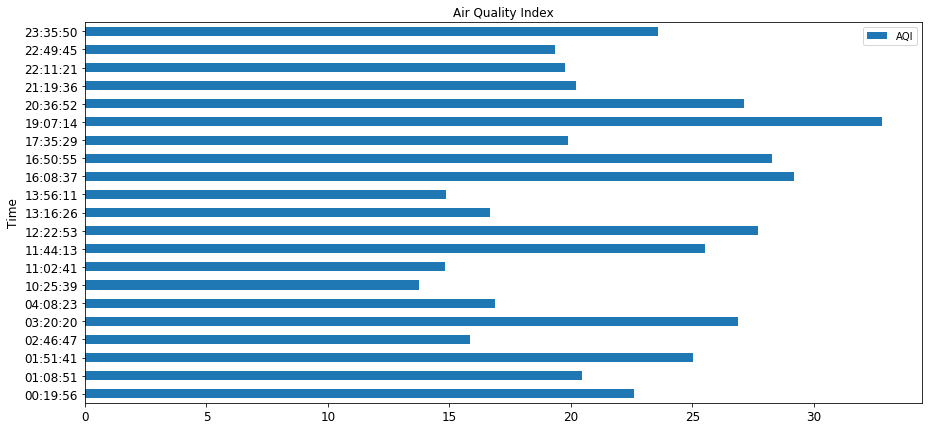

In [244]:
ax = air_quality[['NO2']].plot(kind='barh', title ="NO2 level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['PM10']].plot(kind='barh', title ="PM10 level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['PM25']].plot(kind='barh', title ="PM25 level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['CO']].plot(kind='barh', title ="CO level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['SO2']].plot(kind='barh', title ="SO2 level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['OZONE']].plot(kind='barh', title ="OZONE Level", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

ax = air_quality[['AQI']].plot(kind='barh', title ="Air Quality Index", figsize=(15, 7), legend=True, fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

##### Bar Graph Summary for each Gas and AQI

I have chosen horizontal bar graph so that comparison for a viewer is easy between the bars

AQI  :- Air quality is too good at 10.25 hrs and bad at 19.07 hrs

NO2  :- No2 is highest at 20.36 hrs<br>
PM10 :- PM10 is highest at 11.02 hrs<br>
PM25 :- PM25 is highest at 19.07 hrs<br>
CO   :- CO is constant <br>
SO2  :- SO2 level is highest at 20.36 hrs<br>
OZONE:- oxides are highest at 16.08 hrs<br>


Text(0.5, 0, 'Hours')

<Figure size 432x288 with 0 Axes>

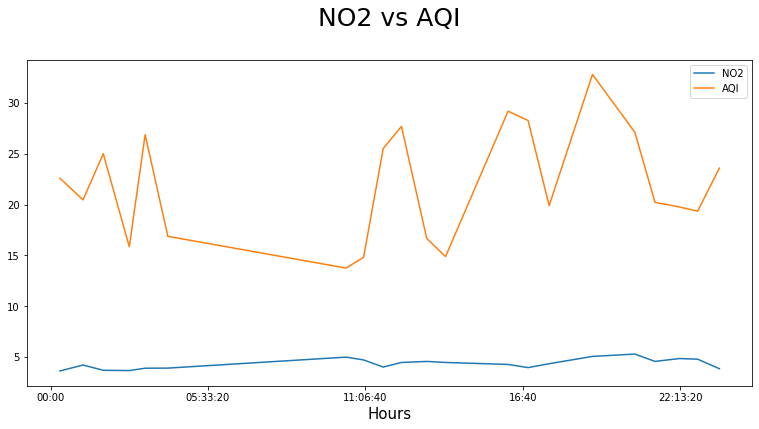

<Figure size 432x288 with 0 Axes>

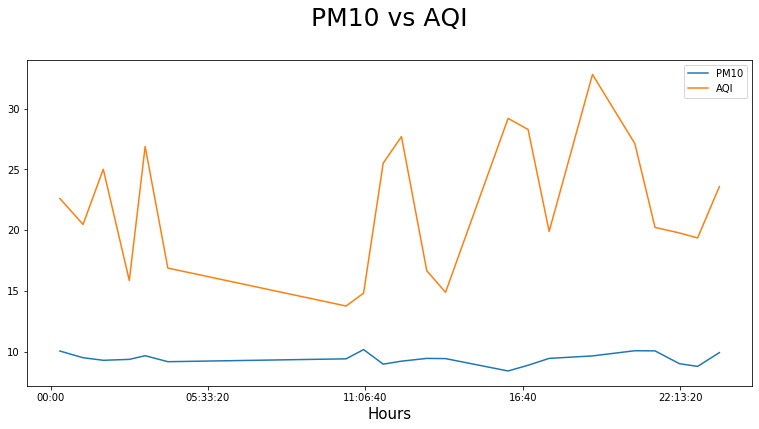

<Figure size 432x288 with 0 Axes>

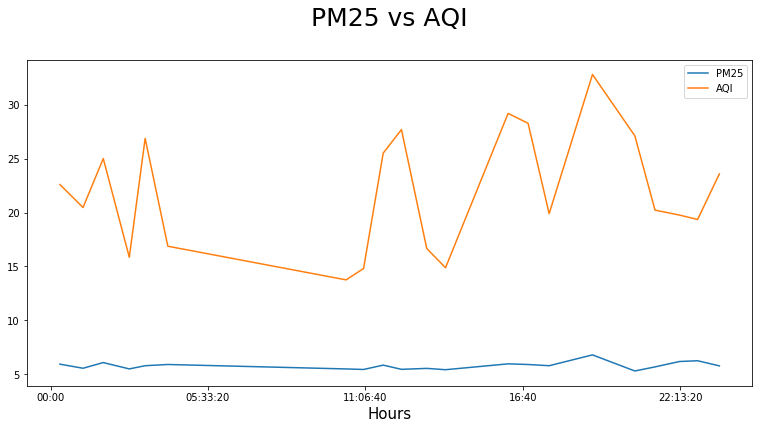

<Figure size 432x288 with 0 Axes>

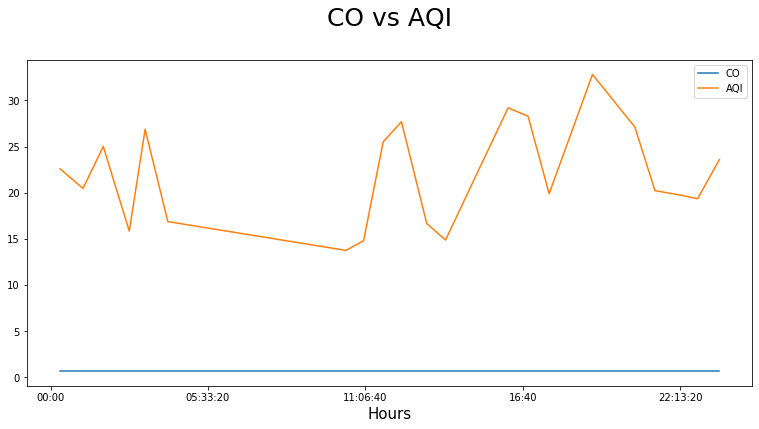

<Figure size 432x288 with 0 Axes>

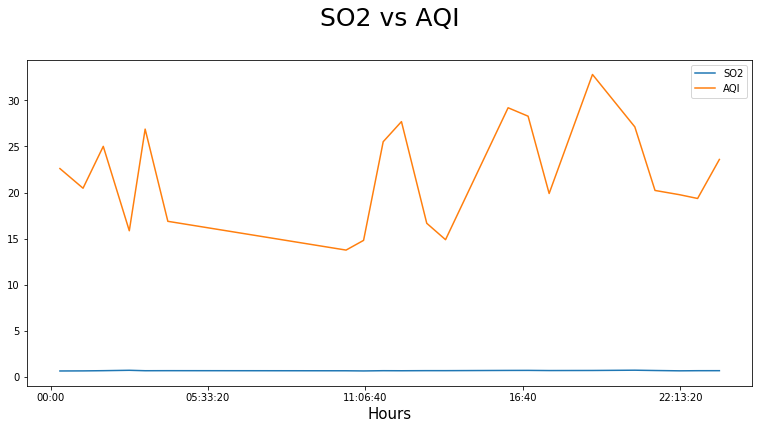

<Figure size 432x288 with 0 Axes>

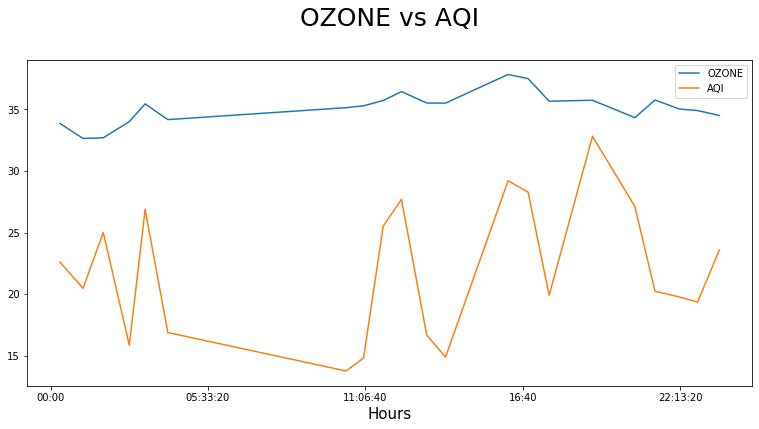

In [225]:
plt.figure()
air_quality[["NO2","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("NO2 vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)


plt.figure()
air_quality[["PM10","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("PM10 vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

plt.figure()
air_quality[["PM25","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("PM25 vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

plt.figure()
air_quality[["CO","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("CO vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

plt.figure()
air_quality[["SO2","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("SO2 vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

plt.figure()
air_quality[["OZONE","AQI"]].plot(stacked=False,figsize=(13,6))
plt.title("OZONE vs AQI\n", fontsize=25)
plt.ylabel("", fontsize=15)
plt.xlabel("Hours", fontsize=15)

#### AQI vs Each gas

In Order to understand the which gas mostly drops the airquality I am using the above graphs

From the above comparisons we see the Air quality is mostly dependent on the Oxides (OZONE) and PM25 also has significant effect on it when compared to other gases.
<br>Spikes for graph OZONE Vs AQI are seen at same intervals and similarly with PM25 vs AQI graph

### Task 6 : Summarization and Further Analysis

From the Analysis above, we can say that with increase levels of Oxides(OZONE) and PM25 causes the Air quality to deplete and augment when decreased.

Moreover the Data collected over peroid of 24hrs mostly has AQI index less than 30 which says air qulaity is very good except for one time frame 17.00-19.00 hrs. From which we can conclude the Air pollution is less for the day data collected.

we can further use same API for collecting data for months, measure the air quality and identify the sources for the toxic gases which reduces the Air Quality, thereby we can impose limitations on them and decrease air pollution